# AllLife Credit Card Customer Segmentation

### Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

### Key Questions:
1.	How many different segments of customers are there?
2.	How are these segments different from each other?
3.	What are your recommendations to the bank on how to better market to and service these customers?

### Data Description:
• Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

### Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. 
2. Perform EDA and take insights out. pts 1 and 2 – (5)
3. Create visualizations to explore data and present the insights. (5)
4. Properly comment on the codes and provide explanations of the steps taken in the notebook. (5)
5. Execute hierarchical and K-means clustering (with different linkages) and do relevant visualisations (elbow plot, dendrograms etc) (10)
7. Perform a silhouette analysis. (5)


## Importing all the necessary packages

In [27]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection  import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

from matplotlib import cm

## Data Analysis - Univariate , EDA , Visualization

In [28]:
ccd = pd.read_excel("Credit Card Customer Data.xlsx")
print("datatype::",ccd.dtypes)
print("shape::",ccd.shape)
ccd.head()

datatype:: Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object
shape:: (660, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [29]:
#Comment
# Data has 660 rows and 7 columns and datatype is same for all attribute so no need to change the data type later

In [30]:
print("Info::",ccd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB
Info:: None


In [31]:
##Remove id since it is redundant
ccd.drop('Sl_No', axis=1, inplace=True)

In [32]:
ccd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


In [33]:
# Comment
# Columns look balanced, Avg_credit_score looking lil right sckewed

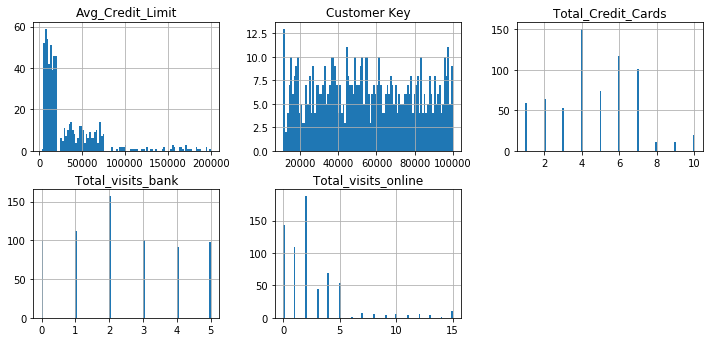

In [34]:
## Histogram of columns

columns = list(ccd)[0:-1]
ccd[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,3));

In [35]:
# Comment
# Many people has 0 avg credit limit
# Customer key is evenly distributed between 20k,100k
# Pleople prefere direct visit bank compared to online

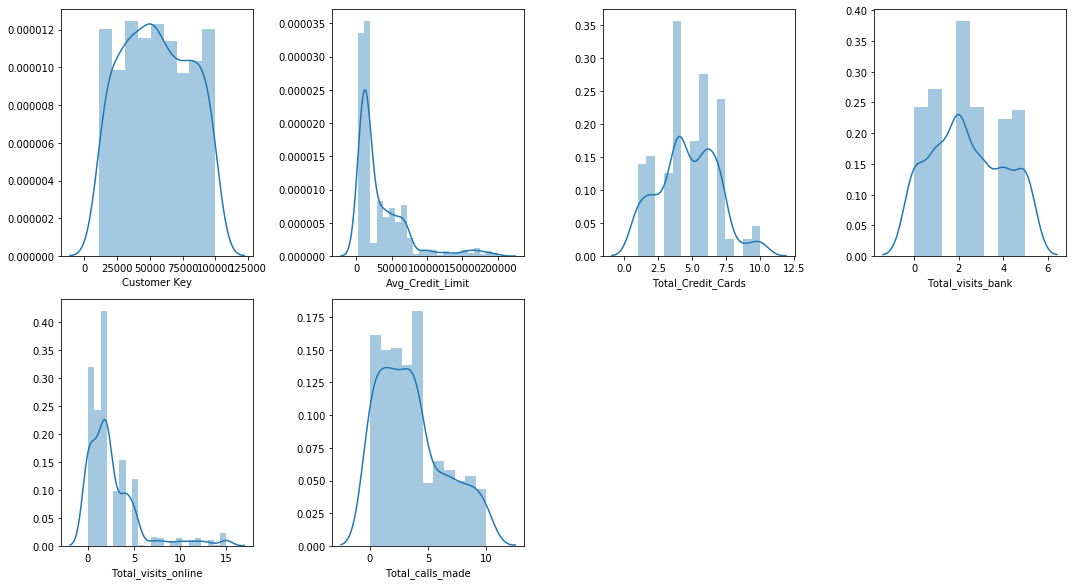

In [36]:
#Distribution Analysis - Gaussians exploration

fig = plt.figure(figsize=(15, 40))
for feature, num in zip(ccd.columns, range(1, len(ccd.columns) + 1)):
    ax = fig.add_subplot(10, 4, num)
    sns.distplot(ccd[feature])
plt.tight_layout()
plt.show()

In [37]:
# Check for missing value
ccd.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [38]:
# Comment
# No missing values in data

In [39]:
cor = ccd.corr(method='kendall')

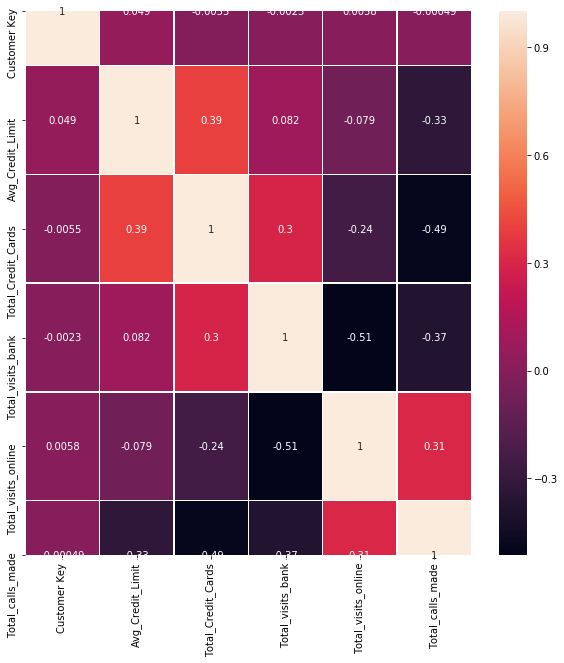

In [40]:
#Heatmap

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

In [41]:
# Comment
# All variables look correlated

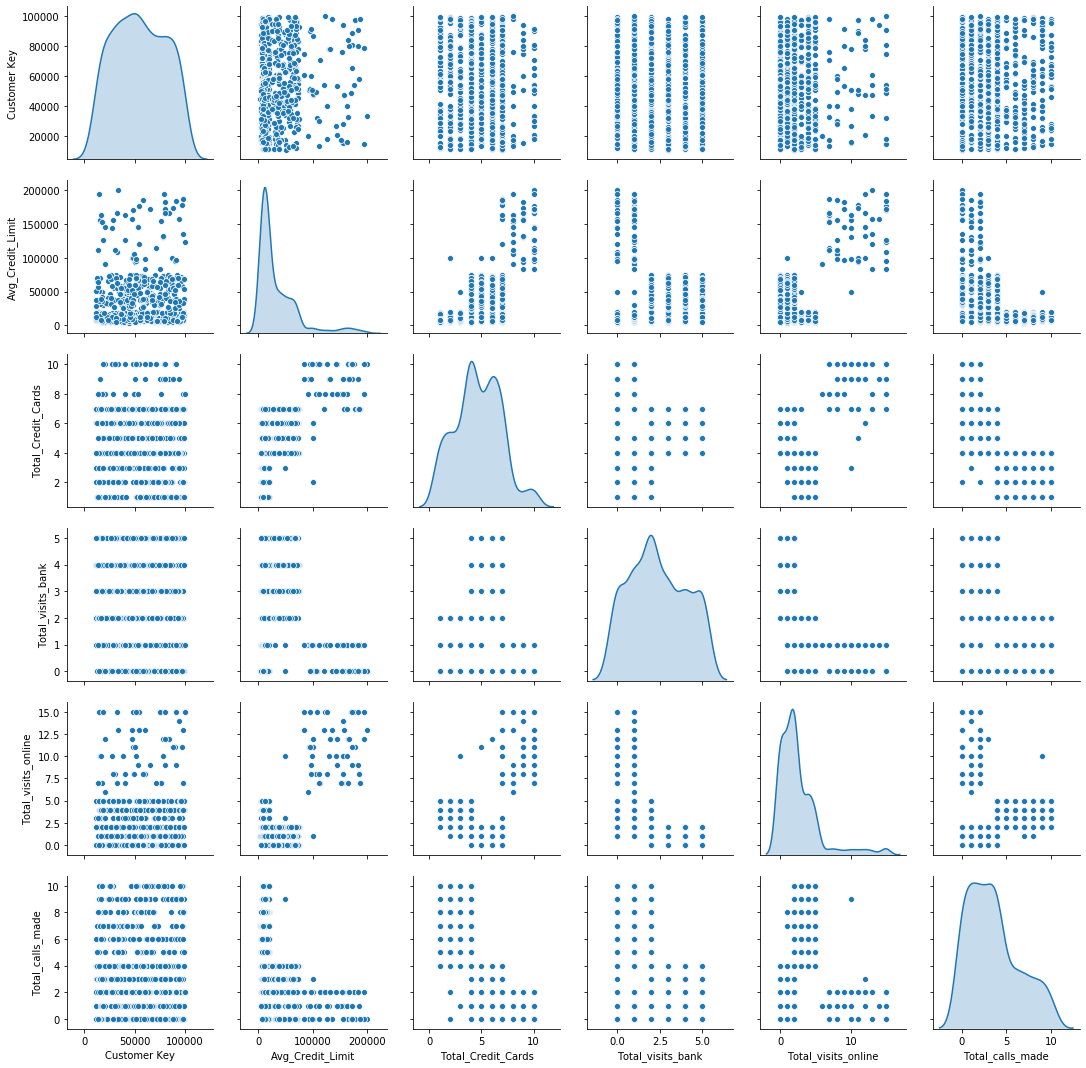

In [42]:
#Pair Plot
sns.pairplot(ccd,diag_kind='kde')

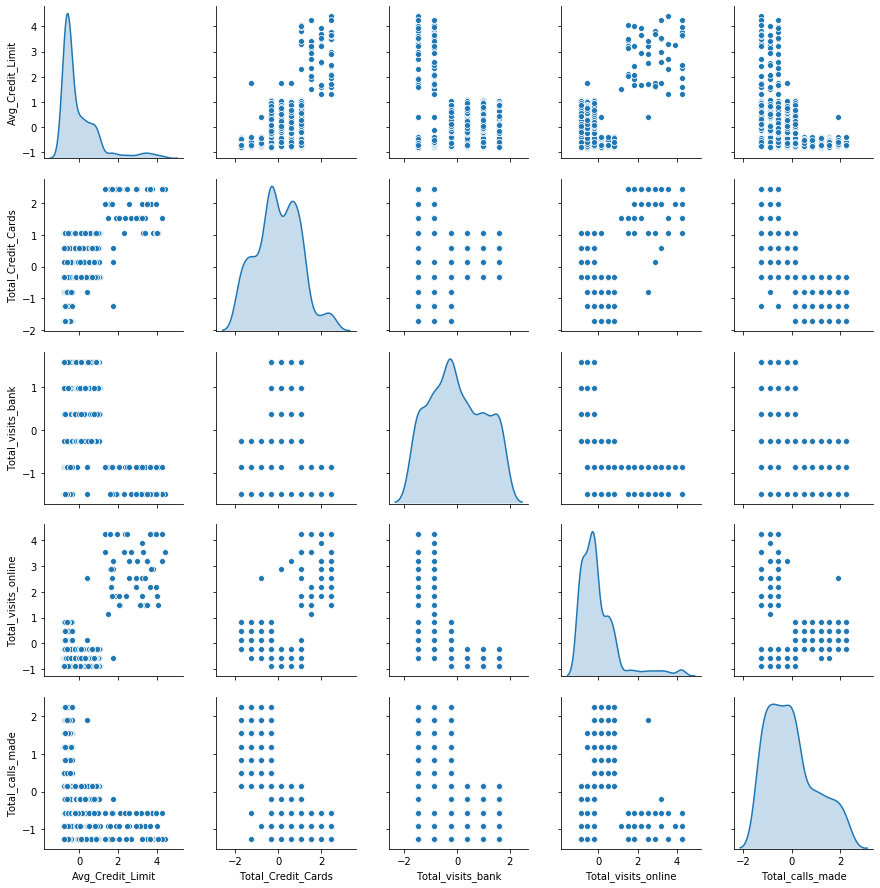

In [43]:
# Comment
# As the data columns were not scaled it might create issue further
# So, performing zscore

ccdAttr=ccd.iloc[:,1:]
ccdScaled=ccdAttr.apply(zscore)
sns.pairplot(ccdScaled,diag_kind='kde')

In [44]:
# Comment
# All variables look correlated

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


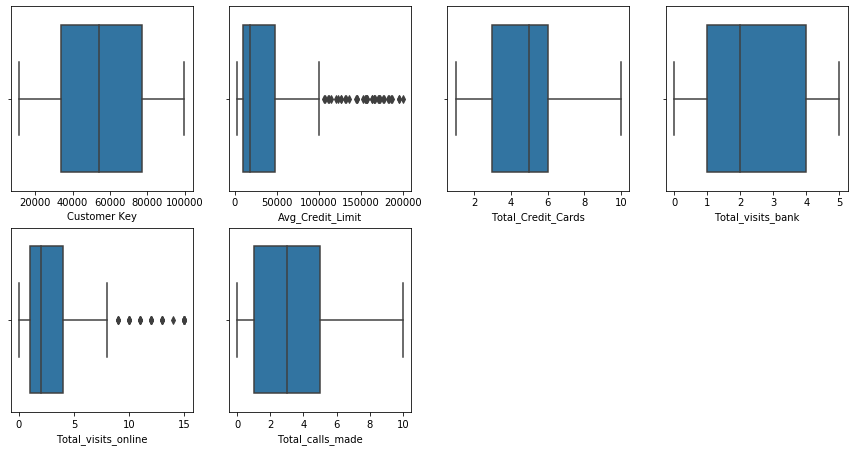

In [45]:
# Box Plot
print(ccd.columns)

## Outlier Check
plt.figure(figsize=(15,40))
pos = 1
for i in ccd.columns:
    plt.subplot(10,4, pos)
    sns.boxplot(ccd[i])
    pos += 1 

In [46]:
#Outlier treatment 
for i in ccd.columns:
    q1, q2, q3 = ccd[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = ccd[i] > q3 + 1.5*IQR
    b = ccd[i] < q1 - 1.5*IQR
    ccd[i] = np.where(a | b, q2, ccd[i])

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


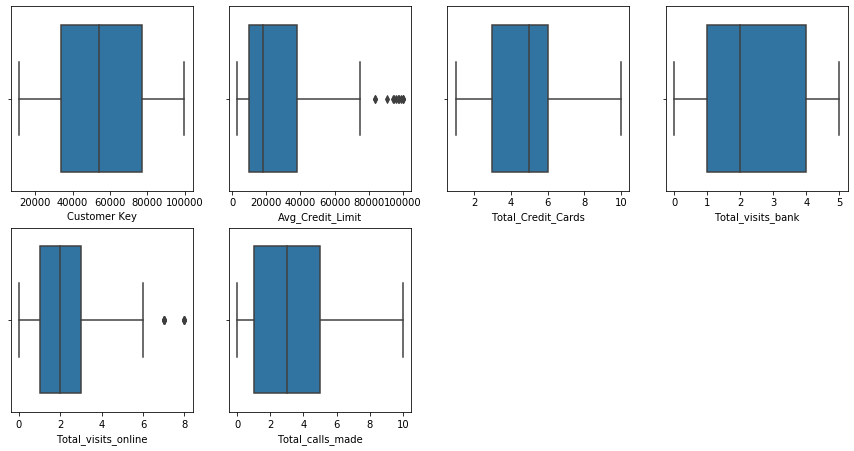

In [47]:
# After treatment - Plotting

# Box Plot
print(ccd.columns)

## Outlier Check
plt.figure(figsize=(15,40))
pos = 1
for i in ccd.columns:
    plt.subplot(10,4, pos)
    sns.boxplot(ccd[i])
    pos += 1 

## K-Means Clustering

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [48]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(ccdScaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,2040.989816
2,3,933.043749
3,4,780.773690
4,5,704.600065
5,6,642.433748
6,7,600.411565
7,8,576.996038
8,9,537.891135


In [49]:
# Comment
# points are mostly grouped at top 4 clusters, later based on alalysis we would choose number of clusters

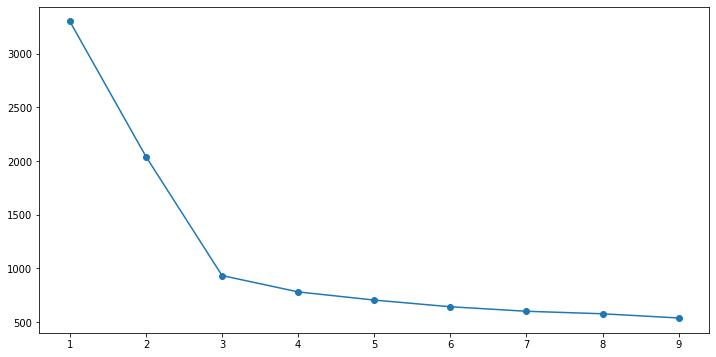

In [50]:
# Elblow chart
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [51]:
# Comment
# We could see the bend at 3, so let us create 3 custers

kmeans = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans.fit(ccdScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [52]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 224 386]


In [53]:
# Comment
# As observed earlier data is mostly contained in first 2 clusters, 3rd has little better points compared to other clusters down the line

In [54]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(ccdScaled) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,2.831764,-0.595796,-0.021062
Total_Credit_Cards,1.862226,-1.059623,0.373690
Total_visits_bank,-1.105763,-0.901518,0.666395
Total_visits_online,2.827319,0.322997,-0.553672
Total_calls_made,-0.874330,1.148109,-0.553005


In [55]:
# Comments
# Segment 0 has highest Avg credit limit, total credit cards, total visits online
# Segment 1 has highest total calls made
# Segment 2 has highest total visits bank

In [56]:
# Add cluster number to original data

predictions = kmeans.predict(ccdScaled)
predictions
ccd["segment"] = predictions
ccdScaled["segment"] = predictions

ccd.dtypes
print("Segments Assigned:")
ccdScaled.head()

Segments Assigned:


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,segment
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0


In [57]:
ccdClust = ccd.groupby(['segment'])
ccdClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
segment,,,,,,
0,56708.760000,34800.000000,8.740000,0.600000,3.500000,1.080000
1,55239.830357,12174.107143,2.410714,0.933036,3.517857,6.870536
2,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000


In [58]:
ccdScaled['segment'].value_counts()  

2    386
1    224
0     50
Name: segment, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020034A66408>,
      dtype=object)

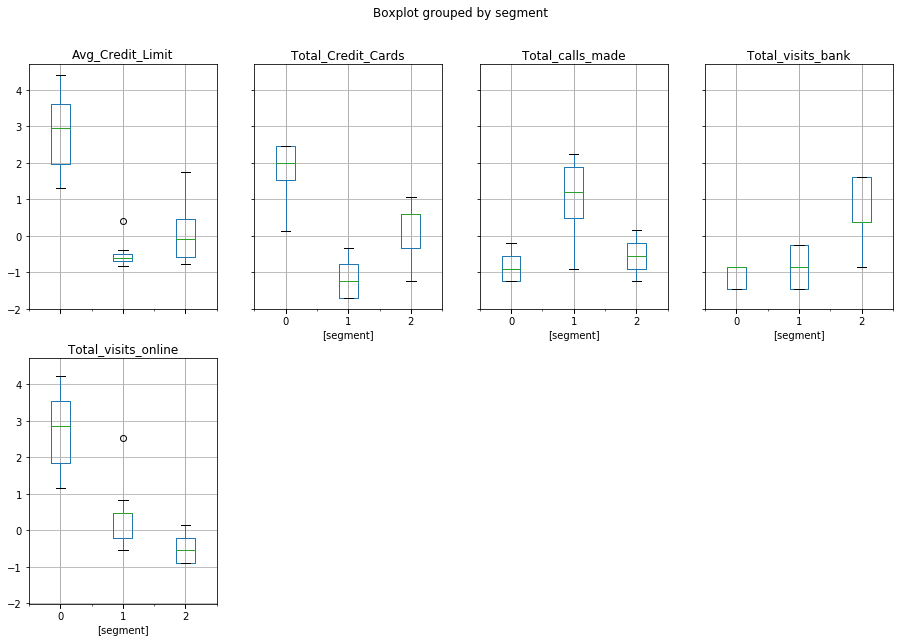

In [59]:
# Visualize the centers
ccdScaled.boxplot(by='segment', layout = (2,4),figsize=(15,10))

Text(0.5, 0.92, '3D plot of KMeans Clustering')

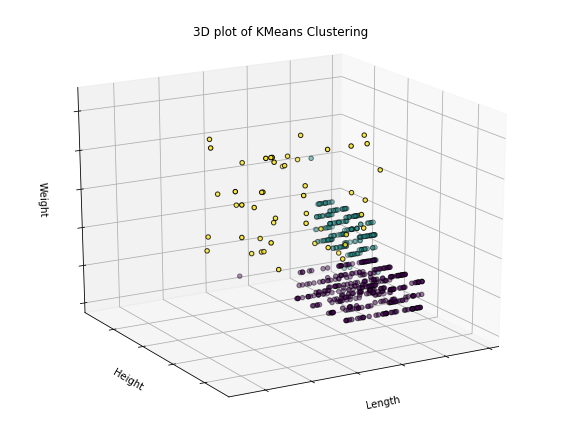

In [60]:
# Cluster Visualization

from mpl_toolkits.mplot3d import Axes3D

## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(ccdScaled)
labels = kmeans.labels_
ax.scatter(ccdScaled.iloc[:, 0], ccdScaled.iloc[:, 1], ccdScaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering') 

## Hierarchical Clustering

In [61]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

Z = linkage(ccdScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(ccdScaled))

c

0.9168725782090766

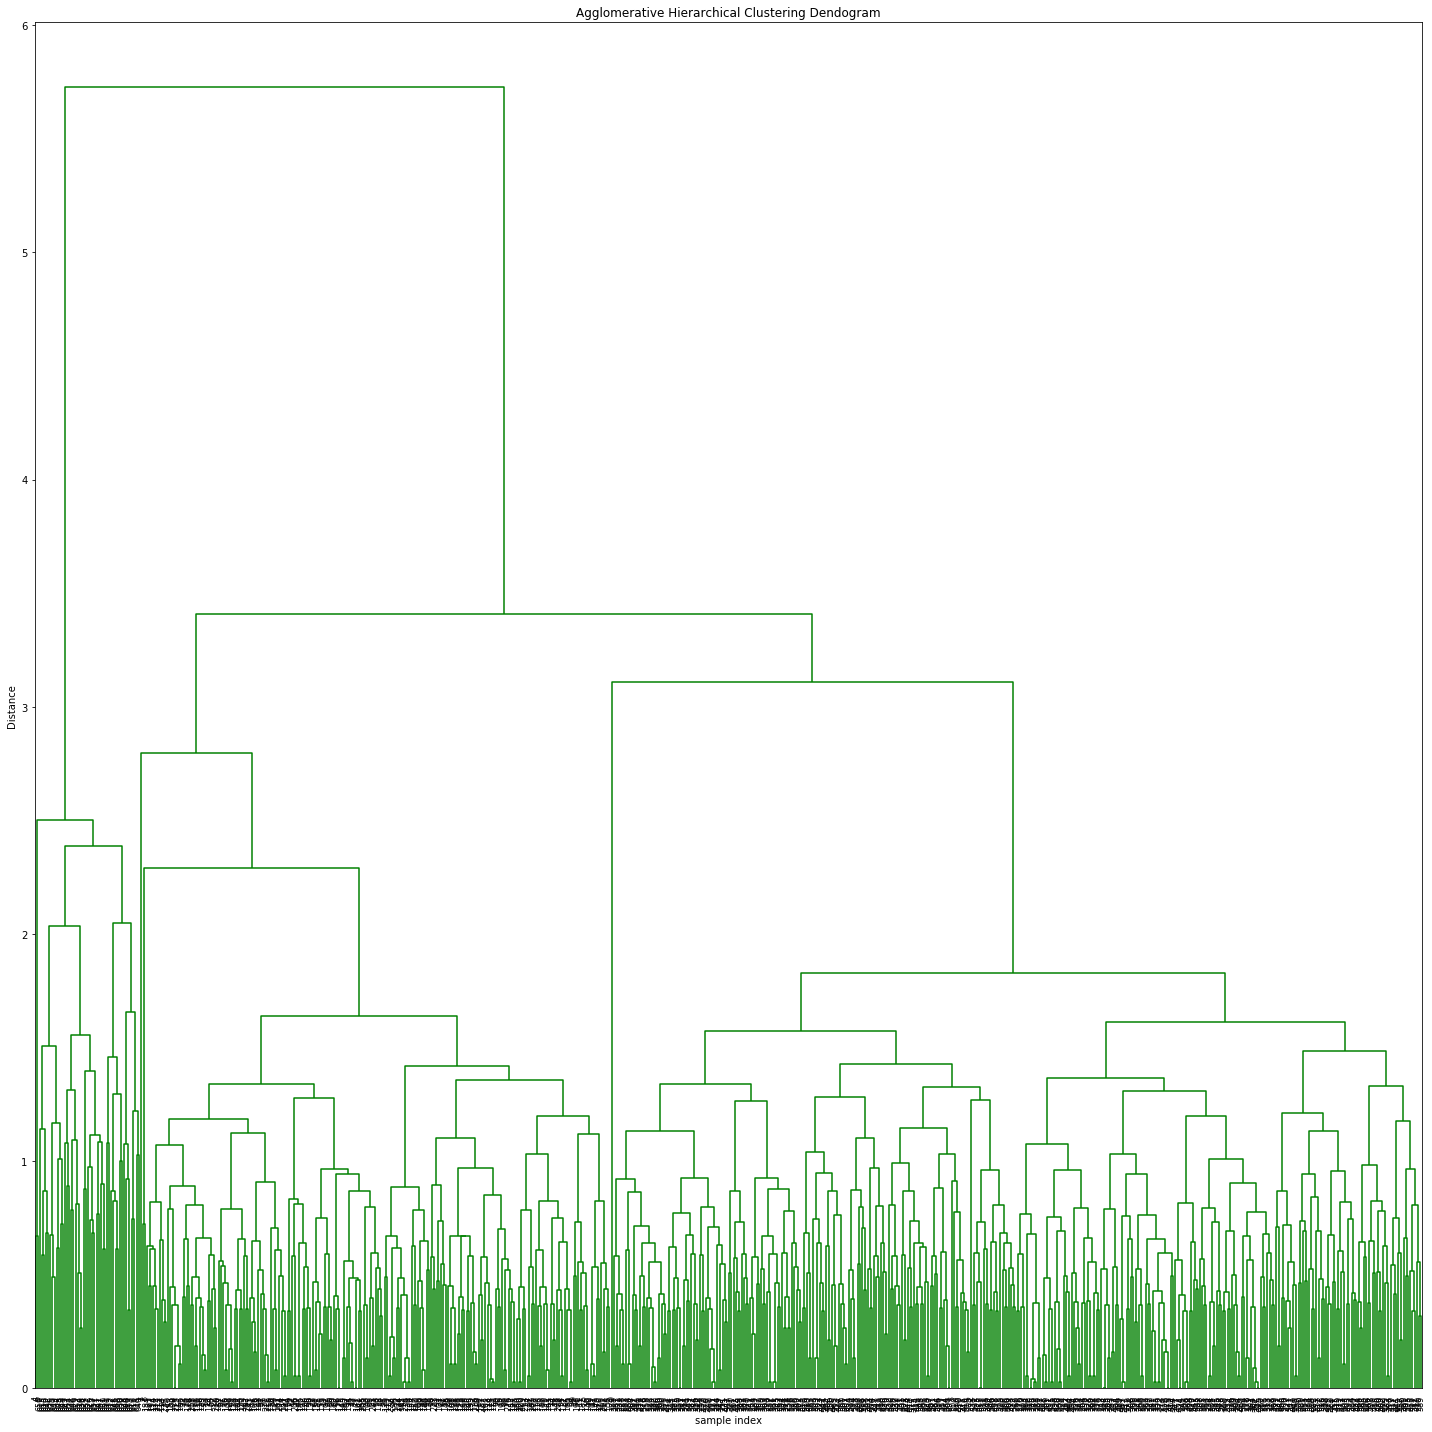

In [62]:
plt.figure(figsize=(20, 20))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [63]:
# Comments
# From the dendogram also, we do see 3 would be optimal number of cluster

### Silhoutte Analysis

In [64]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

X = ccdScaled
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4341883371481038
For n_clusters = 3 The average silhouette_score is : 0.541122811245008
For n_clusters = 4 The average silhouette_score is : 0.3688559032546665
For n_clusters = 5 The average silhouette_score is : 0.2766487630724543
For n_clusters = 6 The average silhouette_score is : 0.25997763066413915


In [65]:
# Silhoutte Analysis shows that the 3 cluster combination has highest score
#For n_clusters = 2 The average silhouette_score is : 0.41842496663215445
#For n_clusters = 3 The average silhouette_score is : 0.5157182558881063
#For n_clusters = 4 The average silhouette_score is : 0.3556670619372605
#For n_clusters = 5 The average silhouette_score is : 0.2717470361089752
#For n_clusters = 6 The average silhouette_score is : 0.25545029453623114

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


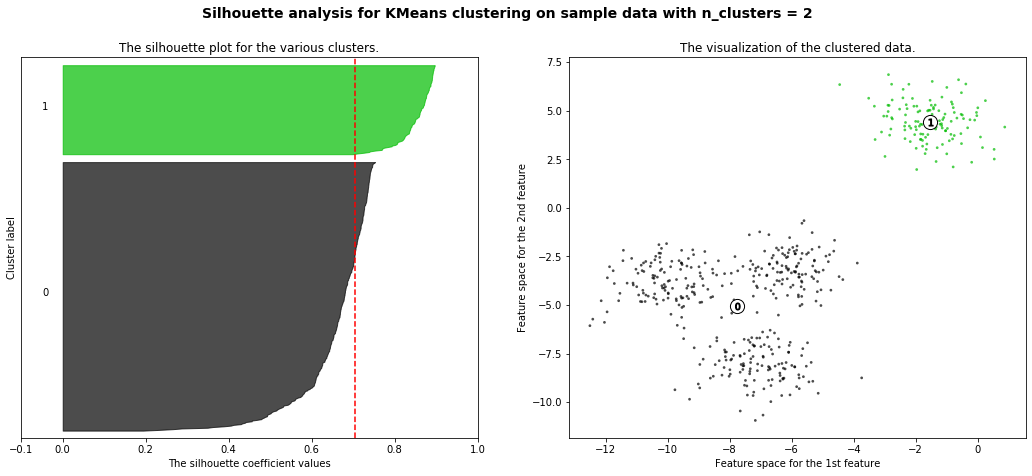

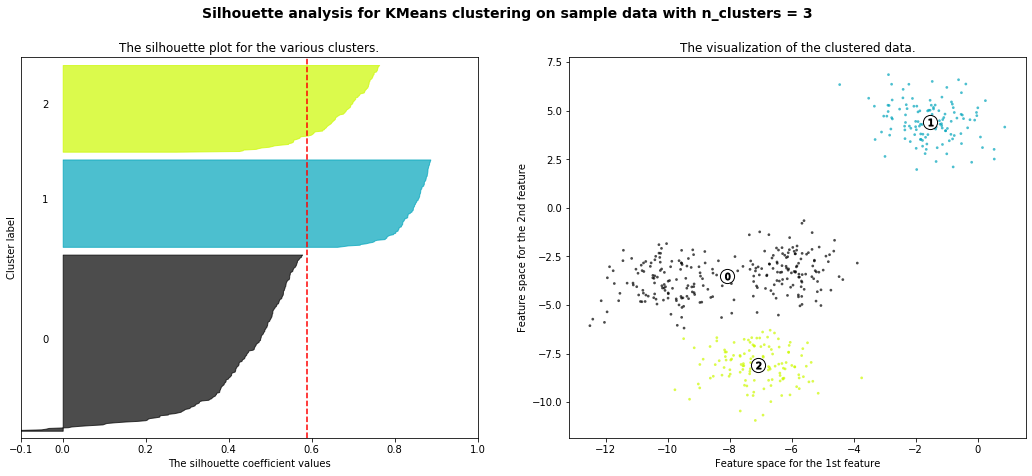

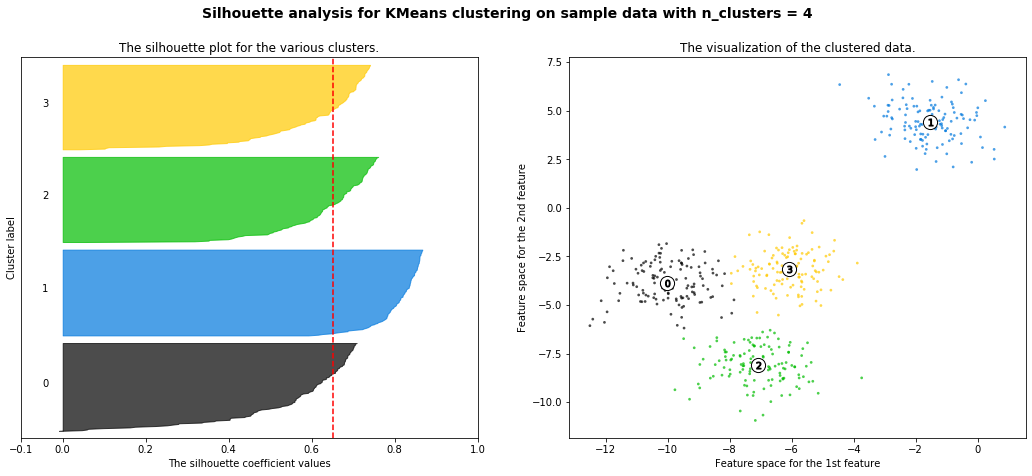

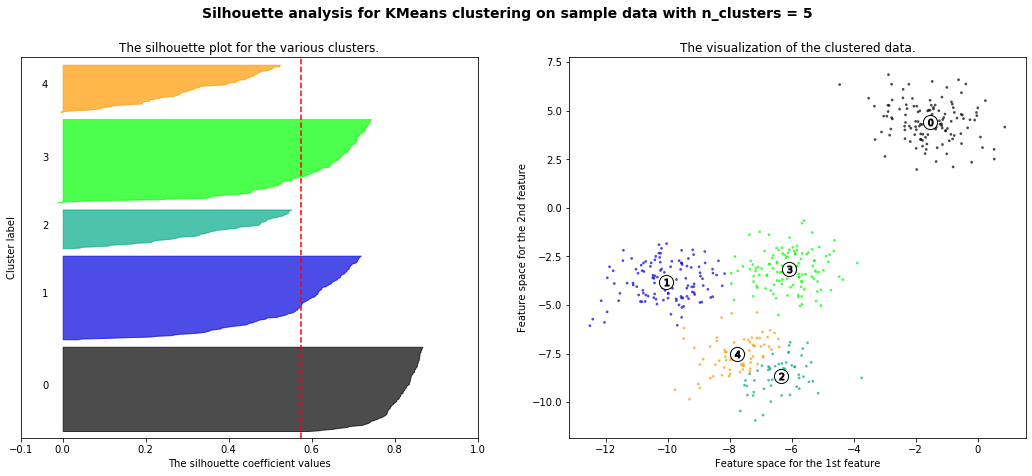

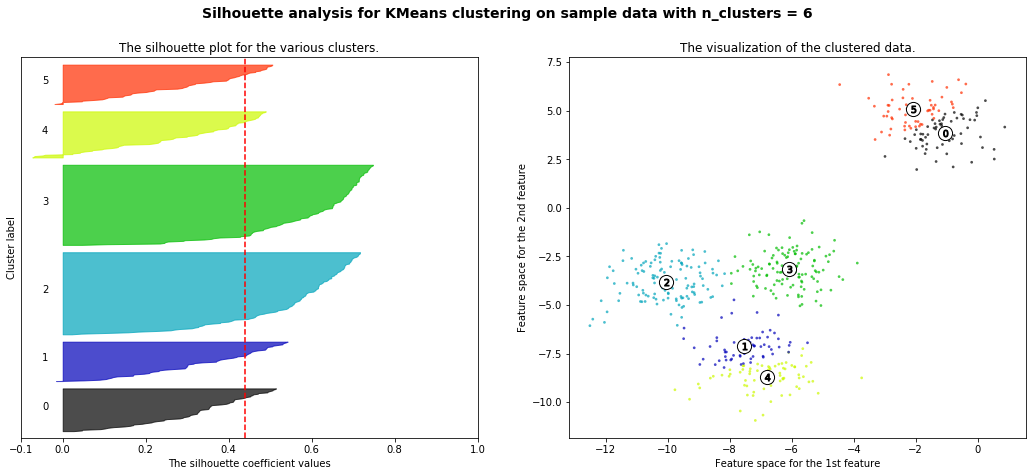

In [66]:
## Trying diff silhoute plots

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

#X = ccdScaled

range_n_clusters = [2, 3, 4, 5, 6]
#range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [67]:
# Comments
# How many different segments of customers are there?
# A: With a analysis of 10 clusters number , we found that there are majorly 3 segments 

# How are these segments different from each other?
# A:the numbers of customers, also they have different distributions of features
# Segment 0 has highest Avg credit limit, total credit cards, total visits online
# Segment 1 has highest total calls made
# Segment 2 has highest total visits bank

# What are your recommendations to the bank on how to better market to and service these customers?
# A:Bank should focus manly on these top 3 clusters as they accomodate 70-80 % of the data